In [9]:
library(dplyr)

# load the data

In [2]:
ts <- read.csv("data/timeseries.csv")
head(ts)

,sim_number,time,chemostat_id,integer,frequency
,<int>,<dbl>,<int>,<int>,<int>
1,1,0,1,1,1000
2,1,1,1,1,1000
3,1,1,1,4,91
4,1,1,1,10,7
5,1,1,1,5,46
6,1,1,1,8,13


# filter the data

In [16]:
# keep only the first ten species
ts <- ts[ts$integer > 1 & ts$integer < 10, ]
head(ts)

ts <- ts[ts$time == 100, ]
head(ts)

summary_ts <- ts %>%
  group_by(integer, sim_number) %>%
  summarize(
    mean_frequency = mean(frequency),
    sd_frequency = sd(frequency),
    .groups = "drop"
  )
  head(summary_ts)

,sim_number,time,chemostat_id,integer,frequency
,<int>,<dbl>,<int>,<int>,<int>
32478,1,100,1,5,33
32485,1,100,1,6,34
32491,1,100,1,2,224
32502,1,100,1,4,64
32588,1,100,1,9,17
32591,1,100,1,7,21


,sim_number,time,chemostat_id,integer,frequency
,<int>,<dbl>,<int>,<int>,<int>
32478,1,100,1,5,33
32485,1,100,1,6,34
32491,1,100,1,2,224
32502,1,100,1,4,64
32588,1,100,1,9,17
32591,1,100,1,7,21


integer,sim_number,mean_frequency,sd_frequency
<int>,<int>,<dbl>,<dbl>
2,1,224,NA
2,2,223,NA
2,3,205,NA
2,4,118,151.32085
2,5,145,94.75231
2,6,225,NA


# load simulation parameters

In [81]:
params <- read.csv("data/params.csv")

# Add the outflow_rate to data
summary_ts$outflow_rate <- sapply(summary_ts$sim_number, function(sim) {
  params$outflow_rate[params$sim_number == sim]
})

# now plot the populations

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


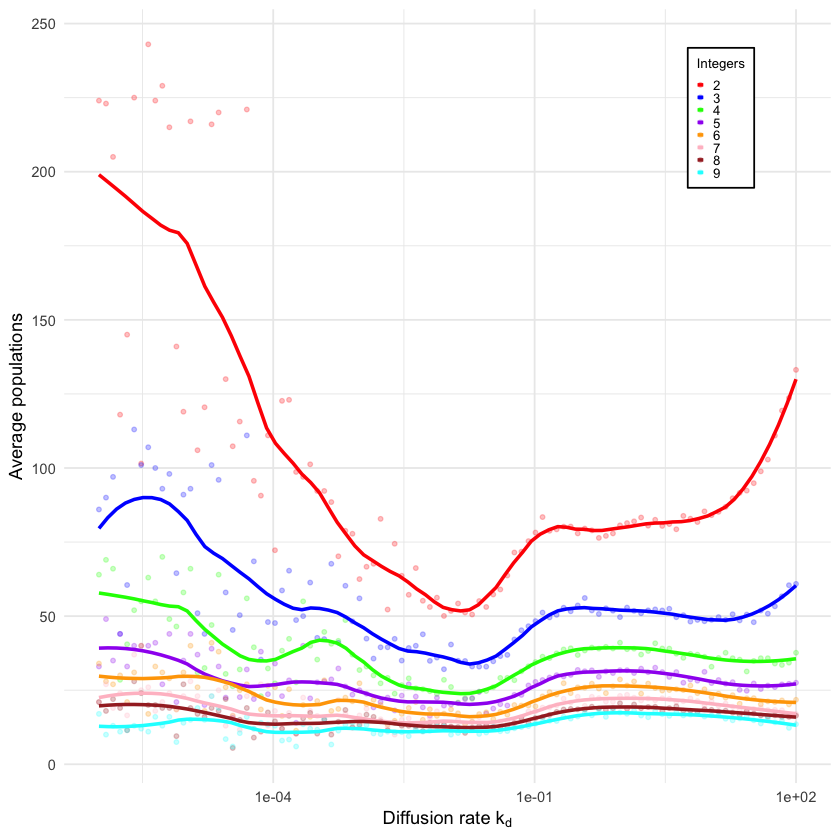

In [103]:
library(latex2exp)
library(glue)

p <- ggplot(summary_ts, aes(x = outflow_rate, y = mean_frequency, color = factor(integer))) +
  geom_point(size = 1, alpha = 0.25) + # Points with transparency and dynamic colors
  geom_smooth(method = "loess", span = 0.25, se = FALSE) + # Add smooth curves for each series
  scale_x_log10() +
  scale_color_manual(
    values = c("2" = "red", "3" = "blue", "4" = "green", "5" = "purple", 
               "6" = "orange", "7" = "pink", "8" = "brown", "9" = "cyan"),
    name = "Integers"
  ) + # Customize colors and legend labels
  labs(
    x = TeX("Diffusion rate $k_d$"),
    y = "Average populations",
    color = "Series"
  ) +
  theme_minimal() + 
  theme(
    legend.justification=c(1,1), 
    legend.position=c(0.90,0.95),
    legend.background = element_rect(fill = "white", color = "black"), # Optional: Customize legend background
    legend.key.size = unit(0.15, "cm"),    # Decrease key size
    legend.text = element_text(size = 8), # Decrease text size
    legend.title = element_text(size = 8) # Decrease title size
  )

print(p)

ggsave(filename = "figs/09C_mean-populations-across-kd.pdf", plot = p, width = 80, height = 70, units = "mm")

# and their standard deviation

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 129 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 129 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 129 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 129 rows containing missing values or values outside the scale range
(`geom_point()`).”


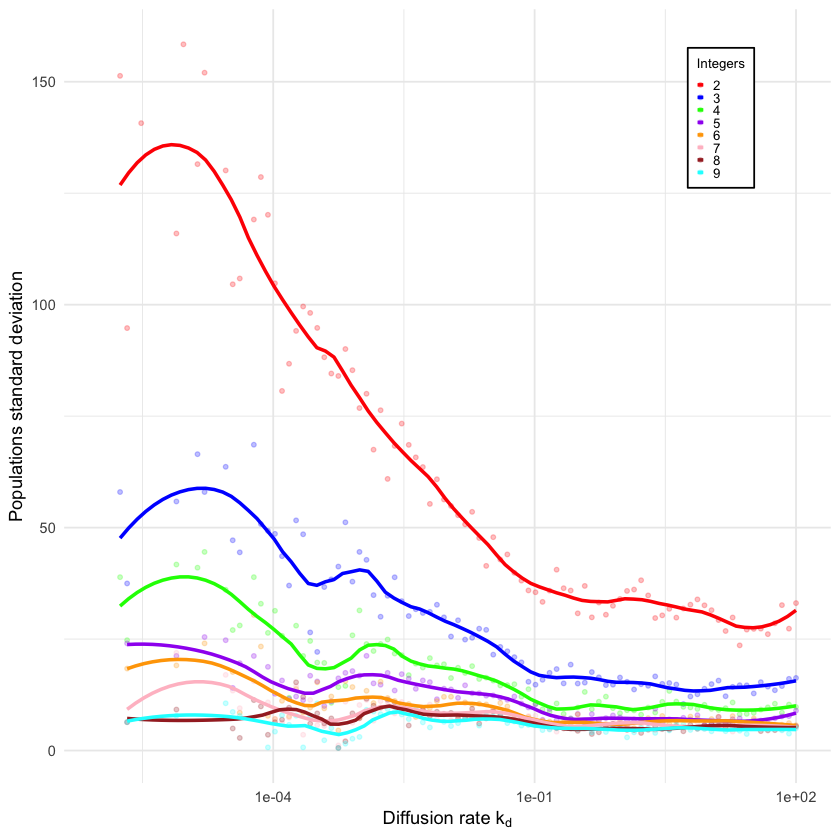

In [104]:
library(latex2exp)
library(glue)

p <- ggplot(summary_ts, aes(x = outflow_rate, y = sd_frequency, color = factor(integer))) +
  geom_point(size = 1, alpha = 0.25) + # Points with transparency and dynamic colors
  geom_smooth(method = "loess", span = 0.25, se = FALSE) + # Add smooth curves for each series
  scale_x_log10() +
  scale_color_manual(
    values = c("2" = "red", "3" = "blue", "4" = "green", "5" = "purple", 
               "6" = "orange", "7" = "pink", "8" = "brown", "9" = "cyan"),
    name = "Integers"
  ) + # Customize colors and legend labels
  labs(
    x = TeX("Diffusion rate $k_d$"),
    y = "Populations standard deviation",
    color = "Series"
  ) +
  theme_minimal() + 
  theme(
    legend.justification=c(1,1), 
    legend.position=c(0.90,0.95),
    legend.background = element_rect(fill = "white", color = "black"), # Optional: Customize legend background
    legend.key.size = unit(0.15, "cm"),    # Decrease key size
    legend.text = element_text(size = 8), # Decrease text size
    legend.title = element_text(size = 8) # Decrease title size
  )

print(p)

ggsave(filename = "figs/09C_sd-populations-across-kd.pdf", plot = p, width = 80, height = 70, units = "mm")